# Test of affect of gene expression and duplication status on eQTL discovery

In [60]:
library(ggplot2)
library(extrafont)
library(scales)
library(reshape2)
library(forcats)
library(ggforce)
library(Hmisc)
options(jupyter.plot_mimetypes = "image/png")
library(cowplot)
library(stargazer)


Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [31]:
affectedStatusWithExpressionLevel <- read.csv("../../outputFiles/geneAffectedStatusWithOhnologStatusAndMedianExpressionLevel.csv")
summary(affectedStatusWithExpressionLevel)

 Ensembl.Gene.ID      affected         medianExpression    Chromosome.Name   
 Length:790141      Length:790141      Min.   :     0.00   Length:790141     
 Class :character   Class :character   1st Qu.:     1.65   Class :character  
 Mode  :character   Mode  :character   Median :     8.26   Mode  :character  
                                       Mean   :    33.45                     
                                       3rd Qu.:    24.50                     
                                       Max.   :246600.00                     
 Gene.Start..bp.     Gene.End..bp.           Strand            tissue         
 Min.   :     5810   Min.   :    31427   Min.   :-1.00000   Length:790141     
 1st Qu.: 31795512   1st Qu.: 31882108   1st Qu.:-1.00000   Class :character  
 Median : 58694396   Median : 58768261   Median : 1.00000   Mode  :character  
 Mean   : 74188632   Mean   : 74259987   Mean   : 0.01267                     
 3rd Qu.:110607231   3rd Qu.:110679475   3rd Qu.: 1.00000  

In [6]:
affectedStatusWithExpressionLevel$affected_num_factors <- 0
affectedStatusWithExpressionLevel[ which(affectedStatusWithExpressionLevel$affected == 'Y'),]$affected_num_factors <- 1
affectedStatusWithExpressionLevel$affected_num_factors <- as.factor(affectedStatusWithExpressionLevel$affected_num_factors)

affectedStatusWithExpressionLevel$ohnolog_num_factors <- 0
affectedStatusWithExpressionLevel[ which(affectedStatusWithExpressionLevel$ohnolog == 'Y'),]$ohnolog_num_factors <- 1
affectedStatusWithExpressionLevel$ohnolog_num_factors <- as.factor(affectedStatusWithExpressionLevel$ohnolog_num_factors)

In [32]:
affectedStatusWithExpressionLevel$affected <- as.factor(affectedStatusWithExpressionLevel$affected)
affectedStatusWithExpressionLevel$ohnolog <- as.factor(affectedStatusWithExpressionLevel$ohnolog)
affectedStatusWithExpressionLevel$type <- as.factor(affectedStatusWithExpressionLevel$type)
affectedStatusWithExpressionLevel$tissue <- as.factor(affectedStatusWithExpressionLevel$tissue)

In [33]:
summary(affectedStatusWithExpressionLevel)

 Ensembl.Gene.ID    affected   medianExpression    Chromosome.Name   
 Length:790141      N:643917   Min.   :     0.00   Length:790141     
 Class :character   Y:146224   1st Qu.:     1.65   Class :character  
 Mode  :character              Median :     8.26   Mode  :character  
                               Mean   :    33.45                     
                               3rd Qu.:    24.50                     
                               Max.   :246600.00                     
                                                                     
 Gene.Start..bp.     Gene.End..bp.           Strand        
 Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 1st Qu.: 31795512   1st Qu.: 31882108   1st Qu.:-1.00000  
 Median : 58694396   Median : 58768261   Median : 1.00000  
 Mean   : 74188632   Mean   : 74259987   Mean   : 0.01267  
 3rd Qu.:110607231   3rd Qu.:110679475   3rd Qu.: 1.00000  
 Max.   :249200395   Max.   :249214145   Max.   : 1.00000  
                    

In [74]:
model <- glm(affected ~ medianExpression * type,family=binomial(link='logit'), data=affectedStatusWithExpressionLevel)

In [75]:
summary(model)


Call:
glm(formula = affected ~ medianExpression * type, family = binomial(link = "logit"), 
    data = affectedStatusWithExpressionLevel)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9498  -0.6701  -0.6700  -0.5773   3.3306  

Coefficients:
                                 Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                    -1.703e+00  5.333e-03 -319.297  < 2e-16 ***
medianExpression               -1.415e-04  3.877e-05   -3.651 0.000262 ***
typesingleton                   3.449e-01  7.384e-03   46.716  < 2e-16 ***
typeSSD                         3.231e-01  7.210e-03   44.817  < 2e-16 ***
medianExpression:typesingleton  1.983e-04  4.322e-05    4.589 4.45e-06 ***
medianExpression:typeSSD        1.438e-04  3.949e-05    3.640 0.000273 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 756925  on 790140  degrees of freedom
Residual deviance: 75387

In [76]:
anova(model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,790140,756925.1,NA
medianExpression,1,1.731104e-02,790139,756925.1,8.953233e-01
type,2,3.026103e+03,790137,753899.0,0.000000e+00
medianExpression:type,2,2.830008e+01,790135,753870.7,7.156737e-07


In [77]:
confint(model)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-1.713402e+00,-1.6924954497
medianExpression,-2.216219e-04,-0.0000700366
typesingleton,3.304584e-01,0.3594017964
typeSSD,3.090106e-01,0.3372744107
medianExpression:typesingleton,1.176327e-04,0.0002868873
medianExpression:typeSSD,7.046962e-05,0.0002250794


In [107]:
-1.713402e+00

[1] -1.713402

In [99]:
coef(model)

(Intercept)               medianExpression 
                 -1.7029421159                  -0.0001415232 
                 typesingleton                        typeSSD 
                  0.3449319290                   0.3231428070 
medianExpression:typesingleton       medianExpression:typeSSD 
                  0.0001983499                   0.0001437561

In [78]:
library(aod)

In [79]:
wald.test(b = coef(model), Sigma = vcov(model), Terms = 3:4)

Wald test:
----------

Chi-squared test:
X2 = 2734.2, df = 2, P(> X2) = 0.0

In [80]:
l <- cbind(0, 0, 1, -1, 0, 0)
wald.test(b = coef(model), Sigma = vcov(model), L = l)

Wald test:
----------

Chi-squared test:
X2 = 9.6, df = 1, P(> X2) = 0.002

In [81]:
exp(cbind(OR = coef(model), confint(model)))

Waiting for profiling to be done...



,OR,2.5 %,97.5 %
(Intercept),0.1821468,0.1802515,0.1840596
medianExpression,0.9998585,0.9997784,0.9999300
typesingleton,1.4118938,1.3916058,1.4324722
typeSSD,1.3814626,1.3620768,1.4011235
medianExpression:typesingleton,1.0001984,1.0001176,1.0002869
medianExpression:typeSSD,1.0001438,1.0000705,1.0002251


In [108]:
stargazer(model, title="Regression Results",
          ci=TRUE, ci.level=0.95, single.row=TRUE)


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Sun, May 09, 2021 - 18:38:51
\begin{table}[!htbp] \centering 
  \caption{Regression Results} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{1}{c}{\textit{Dependent variable:}} \\ 
\cline{2-2} 
\\[-1.8ex] & affected \\ 
\hline \\[-1.8ex] 
 medianExpression & $-$0.0001$^{***}$ ($-$0.0002, $-$0.0001) \\ 
  typesingleton & 0.345$^{***}$ (0.330, 0.359) \\ 
  typeSSD & 0.323$^{***}$ (0.309, 0.337) \\ 
  medianExpression:typesingleton & 0.0002$^{***}$ (0.0001, 0.0003) \\ 
  medianExpression:typeSSD & 0.0001$^{***}$ (0.0001, 0.0002) \\ 
  Constant & $-$1.703$^{***}$ ($-$1.713, $-$1.692) \\ 
 \hline \\[-1.8ex] 
Observations & 790,141 \\ 
Log Likelihood & $-$376,935.400 \\ 
Akaike Inf. Crit. & 753,882.700 \\ 
\hline 
\hline \\[-1.8ex] 
\textit{Note:}  & \multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p

In [83]:
table(affectedStatusWithExpressionLevel$type, affectedStatusWithExpressionLevel$affected)

           
                 N      Y
  ohno      241317  43754
  singleton 190862  49187
  SSD       211738  53283

In [84]:

(Xsq <- chisq.test(table(affectedStatusWithExpressionLevel$type, affectedStatusWithExpressionLevel$affected)))
Xsq$observed
Xsq$expected
Xsq$stdres


	Pearson's Chi-squared test

data:  table(affectedStatusWithExpressionLevel$type, affectedStatusWithExpressionLevel$affected)
X-squared = 2960.8, df = 2, p-value < 2.2e-16


           
                 N      Y
  ohno      241317  43754
  singleton 190862  49187
  SSD       211738  53283

,N,Y
ohno,232315.6,52755.42
singleton,195625.4,44423.62
SSD,215976.0,49044.96


           
                    N         Y
  ohno       54.29895 -54.29895
  singleton -30.00406  30.00406
  SSD       -26.00331  26.00331

In [42]:
wilcox.test(medianExpression ~ affected, data=affectedStatusWithExpressionLevel) 


	Wilcoxon rank sum test with continuity correction

data:  medianExpression by affected
W = 4.4315e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [43]:
tapply(affectedStatusWithExpressionLevel$medianExpression,
       affectedStatusWithExpressionLevel$affected,
       summary)

$N
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00      1.49      8.00     33.42     24.26 246600.00 

$Y
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     2.42     9.33    33.57    25.50 82890.00 


In [44]:
affectedStatusWithExpressionLevelWithoutZero <- affectedStatusWithExpressionLevel[ which(affectedStatusWithExpressionLevel$medianExpression > 0),]

In [45]:
tapply(affectedStatusWithExpressionLevelWithoutZero$medianExpression,
       affectedStatusWithExpressionLevelWithoutZero$affected,
       summary)

$N
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00      1.50      8.01     33.43     24.27 246600.00 

$Y
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     2.43     9.34    33.58    25.50 82890.00 


In [46]:
nrow(affectedStatusWithExpressionLevel[ which(affectedStatusWithExpressionLevel$medianExpression == 0),])

[1] 258

In [47]:
wilcox.test(medianExpression ~ ohnolog, data=affectedStatusWithExpressionLevel) 


	Wilcoxon rank sum test with continuity correction

data:  medianExpression by ohnolog
W = 6.9574e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [88]:
wilcox.test(affectedStatusWithExpressionLevel[ which(affectedStatusWithExpressionLevel$type == 'ohno'),]$medianExpression,
            affectedStatusWithExpressionLevel[ which(affectedStatusWithExpressionLevel$type == 'SSD'),]$medianExpression) 


	Wilcoxon rank sum test with continuity correction

data:  affectedStatusWithExpressionLevel[which(affectedStatusWithExpressionLevel$type == "ohno"), ]$medianExpression and affectedStatusWithExpressionLevel[which(affectedStatusWithExpressionLevel$type == "SSD"), ]$medianExpression
W = 4.1599e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [89]:
wilcox.test(affectedStatusWithExpressionLevel[ which(affectedStatusWithExpressionLevel$type == 'ohno'),]$medianExpression,
            affectedStatusWithExpressionLevel[ which(affectedStatusWithExpressionLevel$type == 'singleton'),]$medianExpression) 


	Wilcoxon rank sum test with continuity correction

data:  affectedStatusWithExpressionLevel[which(affectedStatusWithExpressionLevel$type == "ohno"), ]$medianExpression and affectedStatusWithExpressionLevel[which(affectedStatusWithExpressionLevel$type == "singleton"), ]$medianExpression
W = 3.2808e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [90]:
wilcox.test(affectedStatusWithExpressionLevel[ which(affectedStatusWithExpressionLevel$type == 'SSD'),]$medianExpression,
            affectedStatusWithExpressionLevel[ which(affectedStatusWithExpressionLevel$type == 'singleton'),]$medianExpression) 


	Wilcoxon rank sum test with continuity correction

data:  affectedStatusWithExpressionLevel[which(affectedStatusWithExpressionLevel$type == "SSD"), ]$medianExpression and affectedStatusWithExpressionLevel[which(affectedStatusWithExpressionLevel$type == "singleton"), ]$medianExpression
W = 2.7235e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [85]:
tapply(affectedStatusWithExpressionLevel$medianExpression,
       affectedStatusWithExpressionLevel$ohnolog,
       summary)

$N
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00      1.55      7.94     32.74     23.69 246600.00 

$Y
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     1.84     8.85    34.69    25.95 99095.00 


In [86]:
tapply(affectedStatusWithExpressionLevel$medianExpression,
       affectedStatusWithExpressionLevel$type,
       summary)

$ohno
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     1.84     8.85    34.69    25.95 99095.00 

$singleton
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     2.49    10.34    36.02    27.44 54500.00 

$SSD
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     0.00      1.08      5.96     29.78     20.10 246600.00 


In [49]:
affectedStatusWithExpressionLevel$bins <- as.numeric(cut2(affectedStatusWithExpressionLevel$medianExpression, g=10))

In [50]:
summary(affectedStatusWithExpressionLevel)

 Ensembl.Gene.ID    affected   medianExpression    Chromosome.Name   
 Length:790141      N:643917   Min.   :     0.00   Length:790141     
 Class :character   Y:146224   1st Qu.:     1.65   Class :character  
 Mode  :character              Median :     8.26   Mode  :character  
                               Mean   :    33.45                     
                               3rd Qu.:    24.50                     
                               Max.   :246600.00                     
                                                                     
 Gene.Start..bp.     Gene.End..bp.           Strand        
 Min.   :     5810   Min.   :    31427   Min.   :-1.00000  
 1st Qu.: 31795512   1st Qu.: 31882108   1st Qu.:-1.00000  
 Median : 58694396   Median : 58768261   Median : 1.00000  
 Mean   : 74188632   Mean   : 74259987   Mean   : 0.01267  
 3rd Qu.:110607231   3rd Qu.:110679475   3rd Qu.: 1.00000  
 Max.   :249200395   Max.   :249214145   Max.   : 1.00000  
                    

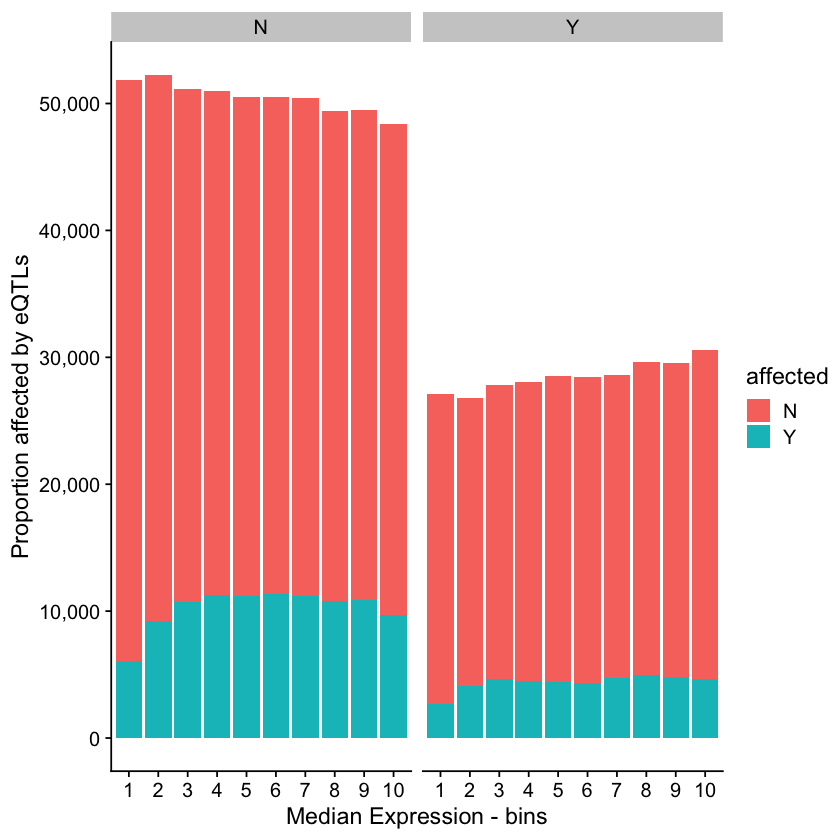

In [52]:
ggplot(affectedStatusWithExpressionLevel, aes(x=factor(bins))) +
geom_bar(aes(fill=affected)) +
scale_y_continuous(name="Proportion affected by eQTLs", labels=comma) +
scale_x_discrete(name="Median Expression - bins") + facet_wrap(~ohnolog)  + theme_cowplot()

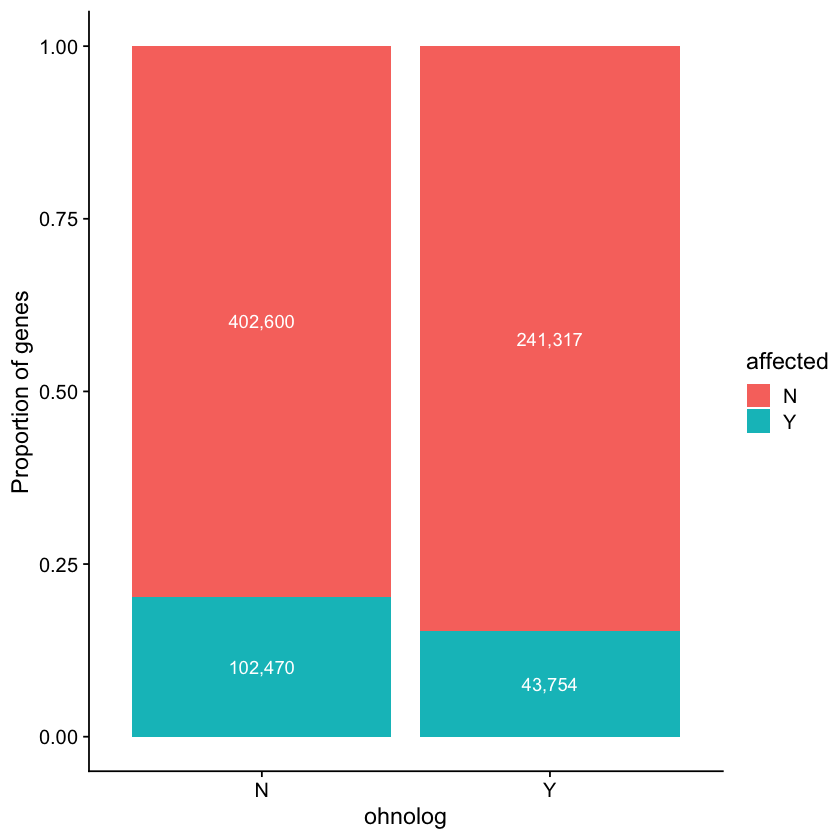

In [53]:
ggplot(affectedStatusWithExpressionLevel, aes(x=ohnolog)) +
geom_bar(aes(fill=affected), position = "fill") +
scale_y_continuous(name="Proportion of genes") +
geom_text(aes(label = prettyNum(..count.., big.mark=","),
               group=affected),
          vjust=0.5,
          stat='count',
          colour = "white",
          position = position_fill(vjust = .5)) +
theme_cowplot()

In [52]:
ggsave('temp1.svg', plot = last_plot(), width = 15, height = 15, units = c("cm"))

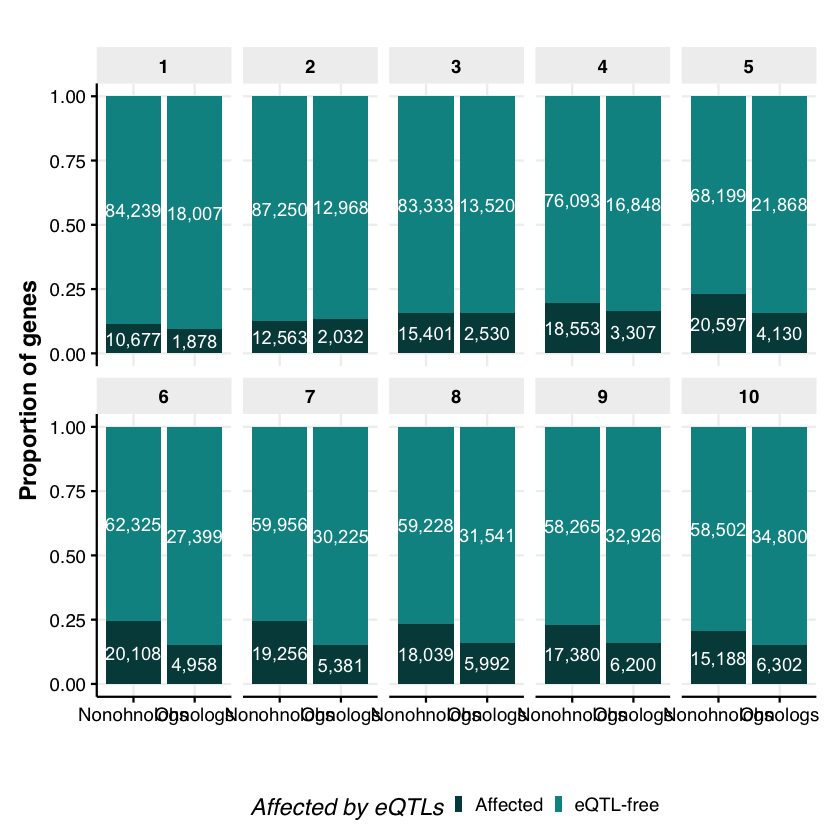

In [17]:
ggplot(affectedStatusWithExpressionLevel, aes(x=ohnolog)) +
geom_bar(aes(fill=affected), position = "fill") +
scale_y_continuous(name="Proportion of genes") +
scale_x_discrete(name="",
    breaks=c(1, 0),
    labels=c("Ohnologs\n", "Nonohnologs")) +
scale_fill_manual(values=c("#009292", "#004949"),
    name="Affected by eQTLs",
    breaks=c(1, 0),
    labels=c("Affected", "eQTL-free")) + 
geom_text(aes(label = prettyNum(..count.., big.mark=","),
               group=affected),
          vjust=0.5,
          stat='count',
          colour = "white",
          position = position_fill(vjust = .5)) +
theme_Publication() + facet_wrap(~bins, nrow = 2)

In [28]:
table(affectedStatusWithExpressionLevel[,c("ohnolog","bins", "affected")])

, , affected = 0

       bins
ohnolog     1     2     3     4     5     6     7     8     9    10
      0 84239 87250 83333 76093 68199 62325 59956 59228 58265 58502
      1 18007 12968 13520 16848 21868 27399 30225 31541 32926 34800

, , affected = 1

       bins
ohnolog     1     2     3     4     5     6     7     8     9    10
      0 10677 12563 15401 18553 20597 20108 19256 18039 17380 15188
      1  1878  2032  2530  3307  4130  4958  5381  5992  6200  6302


In [29]:
mantelhaen.test(table(affectedStatusWithExpressionLevel[,c("ohnolog","bins", "affected")]))

Warning message in ntot * colsums:
“NAs produced by integer overflow”Warning message in ntot * rowsums:
“NAs produced by integer overflow”Warning message in ntot * colsums:
“NAs produced by integer overflow”Warning message in ntot * rowsums:
“NAs produced by integer overflow”

ERROR: Error in qr.default(a, tol = tol): NA/NaN/Inf in foreign function call (arg 1)


In [15]:
(Xsq <- chisq.test(table(affectedStatusWithExpressionLevel[,c("ohnolog","bins")])))  # Prints test summary
Xsq$observed   # observed counts
Xsq$expected   # expected counts under the null
Xsq$stdres     # standardized residuals


	Pearson's Chi-squared test

data:  table(affectedStatusWithExpressionLevel[, c("ohnolog", "bins")])
X-squared = 42495, df = 9, p-value < 2.2e-16


       bins
ohnolog     1     2     3     4     5     6     7     8     9    10
      0 94916 99813 98734 94646 88796 82433 79212 77267 75645 73690
      1 19885 15000 16050 20155 25998 32357 35606 37533 39126 41102

,1,2,3,4,5,6,7,8,9,10
0,86518.67,86527.71,86505.85,86518.67,86513.39,86510.38,86531.48,86517.91,86496.06,86511.88
1,28282.33,28285.29,28278.15,28282.33,28280.61,28279.62,28286.52,28282.09,28274.94,28280.12


       bins
ohnolog         1         2         3         4         5         6         7
      0  60.62914  95.91596  88.29359  58.67973  16.48099 -29.44010 -52.84350
      1 -60.62914 -95.91596 -88.29359 -58.67973 -16.48099  29.44010  52.84350
       bins
ohnolog         8         9        10
      0 -66.79229 -78.35425 -92.57783
      1  66.79229  78.35425  92.57783

In [18]:
ggsave('temp2.svg', plot = last_plot(), width = 26, height = 18, units = c("cm"))

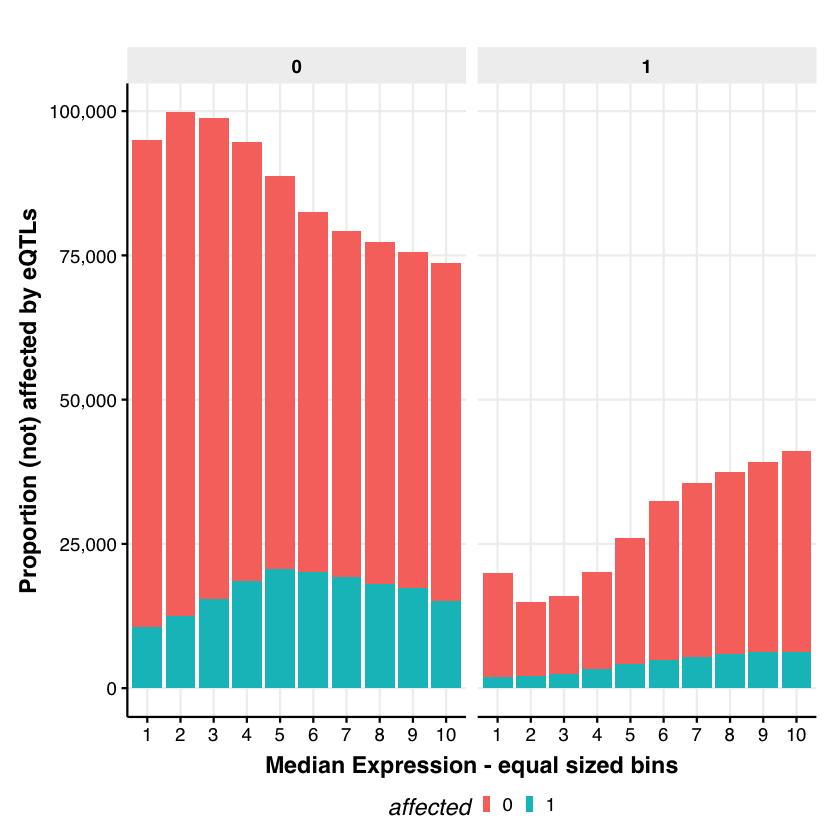

In [19]:
ggplot(affectedStatusWithExpressionLevel, aes(x=factor(bins))) +
geom_bar(aes(fill=affected)) +
scale_y_continuous(name="Proportion (not) affected by eQTLs", labels=comma) +
scale_x_discrete(name="Median Expression - equal sized bins") + theme_Publication() + facet_wrap(~ohnolog)

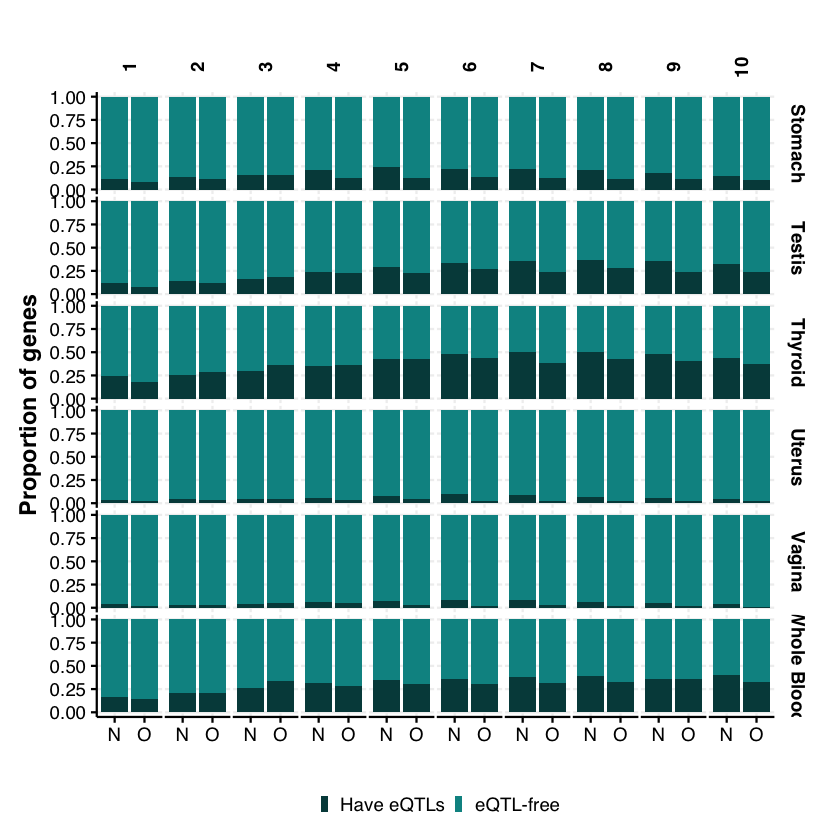

In [103]:
ggplot(affectedStatusWithExpressionLevel, aes(x=ohnolog, fill=factor(affected))) +
    geom_bar(position="fill") +
    #facet_wrap(tissue ~ bins, ncol = 10) +
    facet_grid_paginate(tissue ~ bins, ncol = 10, nrow = 6, page = 8) +
    theme_Publication() +
    theme(strip.placement = "outside", panel.spacing = unit(0.1, 'lines'), strip.background = element_blank(), strip.text.x = element_text(angle = 90, vjust = 0.5)) +
    scale_y_continuous(name="Proportion of genes") +
    scale_x_discrete(name="",
        breaks=c("1", "0"),
        labels=c("O", "N")) +
    scale_fill_manual(values=c("#009292", "#004949"),
        name="",
        breaks=c("1", "0"),
        labels=c("Have eQTLs", "eQTL-free")) 

In [104]:
ggsave('../figures/tissueOhnologTemp8.svg', plot = last_plot(), width = 10, height = 35, units = c("cm"))

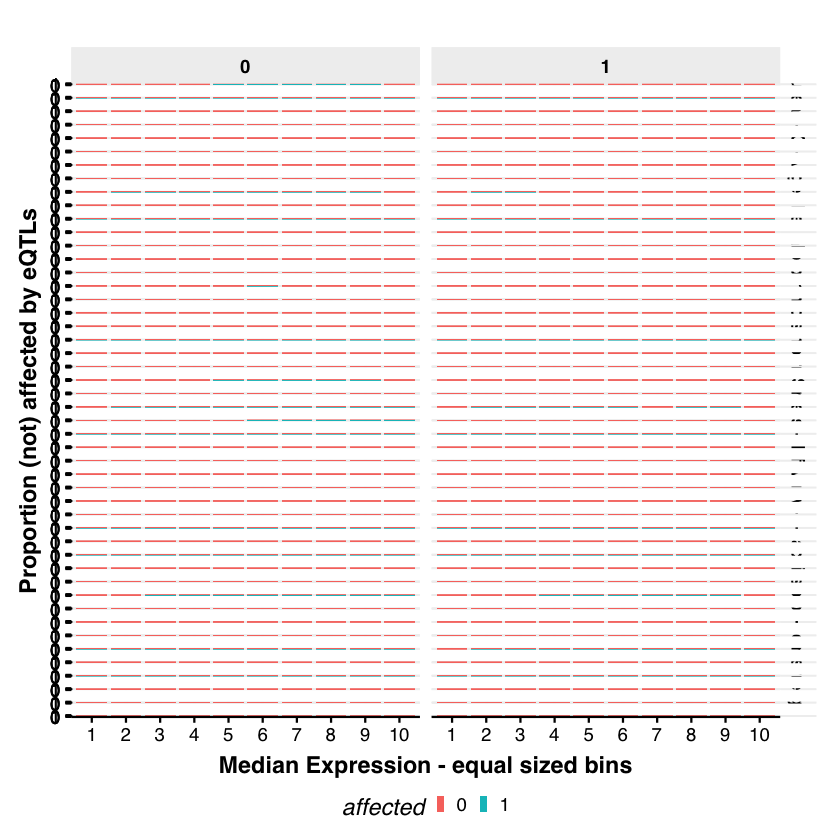

In [21]:
ggplot(affectedStatusWithExpressionLevel, aes(x=factor(bins))) +
geom_bar(aes(fill=affected), position = "fill") +
scale_y_continuous(name="Proportion (not) affected by eQTLs", labels=comma) +
scale_x_discrete(name="Median Expression - equal sized bins") + theme_Publication() + facet_grid(tissue~ohnolog)

In [23]:
ggsave('../figures/tissueOhnologTemp.pdf', plot = last_plot(), width = 30, height = 100, units = c("cm"))

In [ ]:
ggplot(affectedStatusWithExpressionLevel, aes(x=factor(bins))) +
geom_bar(aes(fill=affected), position = "fill") +
scale_y_continuous(name="Proportion (not) affected by eQTLs", labels=comma) +
scale_x_discrete(name="Median Expression - equal sized bins") + facet_wrap(~ohnolog)

In [29]:
tapply(affectedStatusWithExpressionLevel$medianExpression, affectedStatusWithExpressionLevel$bins, summary)

$`1`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.07075 0.10230 0.10376 0.13740 0.17660 

$`2`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1767  0.2212  0.2720  0.2772  0.3308  0.3983 

$`3`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3983  0.4787  0.5745  0.5876  0.6899  0.8297 

$`4`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8297  0.9950  1.1940  1.2199  1.4310  1.7160 

$`5`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.716   2.058   2.458   2.506   2.931   3.488 

$`6`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.489   4.136   4.884   4.953   5.736   6.697 

$`7`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.698   7.788   9.010   9.118  10.400  11.960 

$`8`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11.96   13.79   15.89   16.13   18.35   21.27 

$`9`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.27   24.94   29.58   30.50   35.55   43.66 

$`10`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max